# Video Game Sales Analysis

## By Randy Kim


In [1]:
import pandas as pd
import numpy as np
import requests
import bs4
import webbrowser
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math
import altair as alt

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## EDA
### Inspecting NAs

In [6]:
df.isnull().values.any()

True

In [7]:
nan = df[df.isna().any(axis=1)]
pd.set_option('display.max_rows', 500)
nan.head(500)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [8]:
colname = list(df.columns)

for i in range(len(df.columns)):
    count = df[df.columns[i]].isna().sum()
    print("Column '{col}' has {ct} NAs".format(col = colname[i], ct =count))

Column 'Rank' has 0 NAs
Column 'Name' has 0 NAs
Column 'Platform' has 0 NAs
Column 'Year' has 271 NAs
Column 'Genre' has 0 NAs
Column 'Publisher' has 58 NAs
Column 'NA_Sales' has 0 NAs
Column 'EU_Sales' has 0 NAs
Column 'JP_Sales' has 0 NAs
Column 'Other_Sales' has 0 NAs
Column 'Global_Sales' has 0 NAs


### Replacing NAs

Although, the number of missing values were small compare to the size of the data, I thought it would be interesting for me find the years for those missing values.

Af first, I couldn't figure out how to automate google search with search results. However, after many trials and errors, I finally figured out a way.

Below is a 'hard work' of a person who found the easier way after manualy typing 270 lines of code...

In [9]:
# df.loc[(df.Name == "Madden NFL 2004"), "Year"] = 2003
# df.loc[(df.Name == "FIFA Soccer 2004"), "Year"] = 2003
# df.loc[(df.Name == "LEGO Batman: The Videogame"), "Year"] = 2008
# df.loc[(df.Name == "wwe Smackdown vs. Raw 2006"), "Year"] = 2005
# df.loc[(df.Name == "wwe Smackdown vs. Raw 2006") & (df.Platform == "PS2"), "Publisher"] = "Yuke's"
# df.loc[(df.Name == "Space Invaders"), "Year"] = 1978
# df.loc[(df.Name == "Rock Band"), "Year"] = 2007
# df.loc[(df.Name == "Frogger's Adventures: Temple of the Frog"), "Year"] = 2001
# df.loc[(df.Name == "LEGO Indiana Jones: The Original Adventures"), "Year"] = 2008
# df.loc[(df.Name == "Call of Duty 3"), "Year"] = 2006
# df.loc[(df.Name == "Rock Band") & (df.Platform == "Wii"), "Year"] = 2007
# df.loc[(df.Name == "Call of Duty: Black Ops"), "Year"] = 2010
# df.loc[(df.Name == "Rock Band"), "Year"] = 2007
# df.loc[(df.Name == "Triple Play 99"), "Year"] = 1998
# df.loc[(df.Name == "Triple Play 99") & (df.Platform == "PS"), "Publisher"] = "Electronic Arts"
# df.loc[(df.Name == "LEGO Harry Potter: Years 5-7"), "Year"] = 2011
# df.loc[(df.Name == "Adventure"), "Year"] = 1980
# df.loc[(df.Name == "Combat"), "Year"] = 1977
# df.loc[(df.Name == "NASCAR Thunder 2003"), "Year"] = 2002
# df.loc[(df.Name == "NASCAR Thunder 2003") & (df.Platform == "PS2"), "Publisher"] = "Electronic Arts"
# df.loc[(df.Name == "Shrek / Shrek 2 2-in-1 Gameboy Advance Video") & (df.Platform == "GBA"), "Publisher"] = "Majesco Games"
# df.loc[(df.Name == "Hitman 2: Silent Assassin"), "Year"] = 2002
# df.loc[(df.Name == "Rock Band"), "Year"] = 2007
# df.loc[(df.Name == "Legacy of Kain: Soul Reaver"), "Year"] = 1999
# df.loc[(df.Name == "Donkey Kong Land III") , "Year"] = 1997
# df.loc[(df.Name == "LEGO Harry Potter: Years 5-7"), "Year"] = 2011
# df.loc[(df.Name == "Air-Sea Battle"), "Year"] = 1977
# df.loc[(df.Name == "Suikoden III"), "Year"] = 2002
# df.loc[(df.Name == "Suikoden III") & (df.Platform == "PS2"), "Publisher"] = "Konami"
# df.loc[(df.Name == "Yakuza 4"), "Year"] = 2010
# df.loc[(df.Name == "Wheel of Fortune"), "Year"] = 2003
# df.loc[(df.Name == "Bentley's Hackpack") & (df.Platform == "GBA"), "Publisher"] = "Sony"
# df.loc[(df.Name == "Namco Museum"), "Year"] = 2009
# df.loc[(df.Name == "Namco Museum") & (df.Platform == "XB"), "Publisher"] = "Namco Bandai Games"
# df.loc[(df.Name == "Rhythm Heaven"), "Year"] = 2008
# df.loc[(df.Name == "Rhythm Heaven") & (df.Platform == "Wii"), "Publisher"] = "Nintendo"
# df.loc[(df.Name == "The Lord of the Rings: War in the North"), "Year"] = 2011
# df.loc[(df.Name == "The Lord of the Rings: War in the North"), "Year"] = 2011
# df.loc[(df.Name == "Madden NFL 07"), "Year"] = 2006
# df.loc[(df.Name == "Madden NFL 07") & (df.Platform == "PSP"), "Publisher"] = "Electronic Arts"
# df.loc[(df.Name == "MLB SlugFest 20-03"), "Year"] = 2002
# df.loc[(df.Name == "MLB SlugFest 20-03") & (df.Platform == "PS2"), "Publisher"] = "Midway Games"
# df.loc[(df.Name == "Shaun White Snowboarding"), "Year"] = 2008
# df.loc[(df.Name == "PES 2009: Pro Evolution Soccer"), "Year"] = 2008
# df.loc[(df.Name == "Madden NFL 11"), "Year"] = 2010
# df.loc[(df.Name == "Madden NFL 11") & (df.Platform == "Wii"), "Publisher"] = "Electronic Arts"
# df.loc[(df.Name == "WarioWare: Twisted!"), "Year"] = 2004
# df.loc[(df.Name == "WarioWare: Twisted!") & (df.Platform == "GBA"), "Publisher"] = "Nintendo"
# df.loc[(df.Name == "Madden NFL 2004"), "Year"] = 2003
# df.loc[(df.Name == "FIFA Soccer 2004"), "Year"] = 2003
# df.loc[(df.Name == "Test Drive Unlimited 2"), "Year"] = 2011
# df.loc[(df.Name == "Nicktoons Collection: Game Boy Advance Video V..."), "Year"] = 2006
# df.loc[(df.Name == "SpongeBob SquarePants: Game Boy Advance Video ..."), "Year"] = 2003
# df.loc[(df.Name == "Monster Hunter 2"), "Year"] = 2006
# df.loc[(df.Name == "Advance Wars: Days of Ruin"), "Year"] = 2008
# df.loc[(df.Name == "Metal Gear Solid 2: Substance"), "Year"] = 2002
# df.loc[(df.Name == "The Golden Compass"), "Year"] = 2007
# df.loc[(df.Name == "Madden NFL 06"), "Year"] = 2005
# df.loc[(df.Name == "NASCAR: Dirt to Daytona"), "Year"] = 2002
# df.loc[(df.Name == "NASCAR: Dirt to Daytona") & (df.Platform == "PS2"), "Publisher"] = "Atari"
# df.loc[(df.Name == "Madden NFL 2002"), "Year"] = 2001
# df.loc[(df.Name == "Madden NFL 2002"), "Publisher"] = "Electronic Arts"
# df.loc[(df.Name == "Def Jam: Fight for NY"), "Year"] = 2004
# df.loc[(df.Name == "NBA Street Vol. 2"), "Year"] = 2003
# df.loc[(df.Name == "Fishing Derby"), "Year"] = 1980
# df.loc[(df.Name == "Wet"), "Year"] = 2009
# df.loc[(df.Name == "Sonic the Hedgehog"), "Year"] = 2007
# df.loc[(df.Name == "Sonic the Hedgehog"), "Publisher"] = "Sega"
# df.loc[(df.Name == "Karate"), "Year"] = 1982
# df.loc[(df.Name == "Tiger Woods PGA Tour 07"), "Year"] = 2006
# df.loc[(df.Name == "Circus Atari"), "Year"] = 1977
# df.loc[(df.Name == "The Chronicles of Riddick: Escape from Butcher.."), "Year"] = 2004
# df.loc[(df.Name == "Maze Craze: A Game of Cops 'n Robbers"), "Year"] = 1980
# df.loc[(df.Name == "Silent Hill: Homecoming"), "Year"] = 2008
# df.loc[(df.Name == "Super Breakout"), "Year"] = 1978
# df.loc[(df.Name == "Robert Ludlum's The Bourne Conspiracy"), "Year"] = 2008
# df.loc[(df.Name == "The Fairly Odd Parents: Game Boy Advance Video..."), "Year"] = 2003
# df.loc[(df.Name == "NHL Slapshot"), "Year"] = 2010
# df.loc[(df.Name == "NHL Slapshot"), "Publisher"] = "Electronic Arts"
# df.loc[(df.Name == "TERA"), "Year"] = 2011
# df.loc[(df.Name == "NFL GameDay 2003"), "Year"] = 2002
# df.loc[(df.Name == "NFL GameDay 2003"), "Publisher"] = "Electronic Arts"
# df.loc[(df.Name == "Harvest Moon: Save the Homeland"), "Year"] = 2001
# df.loc[(df.Name == "Hangman"), "Year"] = 1978
# df.loc[(df.Name == "NBA Live 2003"), "Year"] = 2002
# df.loc[(df.Name == "Bejeweled 3"), "Year"] = 2010
# df.loc[(df.Name == "Cubix Robots for Everyone: Clash 'n' Bash"), "Year"] = 2002
# df.loc[(df.Name == "Cubix Robots for Everyone: Clash 'n' Bash"), "Publisher"] = "Nintendo"
# df.loc[(df.Name == "Tropico 4"), "Year"] = 2011
# df.loc[(df.Name == "Tomb Raider (2013)"), "Year"] = 2013
# df.loc[(df.Name == "Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)"), "Year"] = 2006
# df.loc[(df.Name == "Custom Robo"), "Year"] = 2004
# df.loc[(df.Name == "Final Fantasy XI"), "Year"] = 2002
# df.loc[(df.Name == "Singularity"), "Year"] = 2010
# df.loc[(df.Name == "Cartoon Network Collection: Game Boy Advance V..."), "Year"] = 2005
# df.loc[(df.Name == "Dragster"), "Year"] = 1980
# df.loc[(df.Name == "All-Star Baseball 2005"), "Year"] = 2004
# df.loc[(df.Name == "Star Wars Jedi Knight II: Jedi Outcast"), "Year"] = 2002
# df.loc[(df.Name == "Slot Machine"), "Year"] = 1979
# df.loc[(df.Name == "Shrek the Third"), "Year"] = 2007
# df.loc[(df.Name == "The Dukes of Hazzard II: Daisy Dukes It Out"), "Year"] = 2000
# df.loc[(df.Name == "Disgaea 3: Absence of Detention"), "Year"] = 2008
# df.loc[(df.Name == "NBA Live 2003"), "Year"] = 2002
# df.loc[(df.Name == "Harvest Moon: The Tale of Two Towns"), "Year"] = 2010
# df.loc[(df.Name == "Nicktoons: Battle for Volcano Island"), "Year"] = 2006
# df.loc[(df.Name == "Haven: Call of the King"), "Year"] = 2002
# df.loc[(df.Name == "Unreal Championship 2: The Liandri Conflict"), "Year"] = 2005
# df.loc[(df.Name == "Pac-Man Fever"), "Year"] = 1982
# df.loc[(df.Name == "The Legend of Zelda: The Minish Cap(weekly JP .."), "Year"] = 2004
# df.loc[(df.Name == "Indy 500"), "Year"] = 1989
# df.loc[(df.Name == "Gun"), "Year"] = 2005
# df.loc[(df.Name == "Flag Capture"), "Year"] = 1978
# df.loc[(df.Name == "Sonic X: Game Boy Advance Video Volume 1"), "Year"] = 2004
# df.loc[(df.Name == "Rock Revolution"), "Year"] = 2008
# df.loc[(df.Name == "Jonah Lomu Rugby Challenge"), "Year"] = 2011
# df.loc[(df.Name == "Dora the Explorer: Game Boy Advance Video Volu..."), "Year"] = 2004
# df.loc[(df.Name == "College Hoops 2K6"), "Year"] = 2005
# df.loc[(df.Name == "Cartoon Network Collection: Game Boy Advance V..."), "Year"] = 2005
# df.loc[(df.Name == "Mega Man X Collection"), "Year"] = 2006
# df.loc[(df.Name == "BioShock 2"), "Year"] = 2010
# df.loc[(df.Name == "Singularity"), "Year"] = 2010
# df.loc[(df.Name == "All Grown Up!: Game Boy Advance Video Volume 1"), "Year"] = 2003
# df.loc[(df.Name == "Danganronpa: Trigger Happy Havoc"), "Year"] = 2010
# df.loc[(df.Name == "DanceDanceRevolution II"), "Year"] = 2011
# df.loc[(df.Name == "Tony Hawk's Downhill Jam"), "Year"] = 2006
# df.loc[(df.Name == "Big Beach Sports 2"), "Year"] = 2010
# df.loc[(df.Name == "Jet X20"), "Year"] = 2002
# df.loc[(df.Name == "Tribes: Aerial Assault"), "Year"] = 2002
# df.loc[(df.Name == "Move Fitness"), "Year"] = 2013
# df.loc[(df.Name == "Nicktoons Collection: Game Boy Advance Video V..."), "Year"] = 2006
# df.loc[(df.Name == "Yu Yu Hakusho: Dark Tournament"), "Year"] = 2004
# df.loc[(df.Name == "Ghostbusters II"), "Year"] = 1989
# df.loc[(df.Name == "Breakaway IV"), "Year"] = 1978
# df.loc[(df.Name == "Robotech: Battlecry"), "Year"] = 2002
# df.loc[(df.Name == "Valkyria Chronicles III: Unrecorded Chronicles"), "Year"] = 2011
# df.loc[(df.Name == "WRC: FIA World Rally Championship"), "Year"] = 2010
# df.loc[(df.Name == "Famista 64"), "Year"] = 1997
# df.loc[(df.Name == "Dead Space 3"), "Year"] = 2013
# df.loc[(df.Name == "Pet Zombies"), "Year"] = 2011
# df.loc[(df.Name == "Star Trek: Legacy"), "Year"] = 2006
# df.loc[(df.Name == "Thomas the Tank Engine & Friends"), "Year"] = 2001
# df.loc[(df.Name == "Trauma Team"), "Year"] = 2010
# df.loc[(df.Name == "Backbreaker"), "Year"] = 2009
# df.loc[(df.Name == "Twisted Metal: Small Brawl"), "Year"] = 2001
# df.loc[(df.Name == "Otomedius Excellent"), "Year"] = 2011
# df.loc[(df.Name == "NBA Starting Five"), "Year"] = 2002
# df.loc[(df.Name == "Teen Titans"), "Year"] = 2005
# df.loc[(df.Name == "Sword of the Samurai"), "Year"] = 1989
# df.loc[(df.Name == "Splatterhouse"), "Year"] = 1988
# df.loc[(df.Name == "Stronghold 3"), "Year"] = 2011
# df.loc[(df.Name == "Alone in the Dark: The New Nightmare"), "Year"] = 2001
# df.loc[(df.Name == "Vegas Party"), "Year"] = 2009
# df.loc[(df.Name == "Jurassic Park: The Game"), "Year"] = 2011
# df.loc[(df.Name == "Home Run"), "Year"] = 1978
# df.loc[(df.Name == "eJay Clubworld"), "Year"] = 1997
# df.loc[(df.Name == "Our House Party!"), "Year"] = 2009
# df.loc[(df.Name == "WCW Backstage Assault"), "Year"] = 2000
# df.loc[(df.Name == "Disney's Cinderella: Magical Dreams"), "Year"] = 2005
# df.loc[(df.Name == "Transworld Surf"), "Year"] = 2001
# df.loc[(df.Name == "Street Fighter IV"), "Year"] = 2008
# df.loc[(df.Name == "Farming Simulator 2011"), "Year"] = 2010
# df.loc[(df.Name == "Nintendo Puzzle Collection"), "Year"] = 2003
# df.loc[(df.Name == "Nintendo Puzzle Collection"), "Publisher"] = "Nintendo"
# df.loc[(df.Name == "Charm Girls Club: My Fashion Mall"), "Year"] = 2009
# df.loc[(df.Name == "Record of Agarest War Zero"), "Year"] = 2009
# df.loc[(df.Name == "Saru! Get You! Million Monkeys"), "Year"] = 2006
# df.loc[(df.Name == "Street Hoops"), "Year"] = 2002
# df.loc[(df.Name == "Godzilla: Destroy All Monsters Melee"), "Year"] = 2002
# df.loc[(df.Name == "The Daring Game for Girls"), "Year"] = 2009
# df.loc[(df.Name == "Rocksmith"), "Year"] =2011
# df.loc[(df.Name == "Rocksmith"), "Publisher"] = "Ubisoft"
# df.loc[(df.Name == "Major League Baseball 2K6"), "Year"] = 2005
# df.loc[(df.Name == "Major League Baseball 2K6"), "Publisher"] = "Electronic Arts"
# df.loc[(df.Name == "Happy Feet Two"), "Year"] = 2006
# df.loc[(df.Name == "Star Trek: Conquest"), "Year"] = 2007
# df.loc[(df.Name == "GiFTPiA"), "Year"] = 2003
# df.loc[(df.Name == "Atsumare! Power Pro Kun no DS Koushien"), "Year"] = 2006
# df.loc[(df.Name == "My Healthy Cooking Coach"), "Year"] = 2009
# df.loc[(df.Name == "Luminous Arc 2 (JP sales)"), "Year"] = 2008
# df.loc[(df.Name == "The Daring Game for Girls"), "Year"] = 2009
# df.loc[(df.Name == "Egg Monster Hero"), "Year"] = 2005
# df.loc[(df.Name == "Samurai Shodown Anthology"), "Year"] = 2008
# df.loc[(df.Name == "Demon Chaos"), "Year"] = 2005
# df.loc[(df.Name == "Action Man-Operation Extreme"), "Year"] = 2000
# df.loc[(df.Name == "Super Puzzle Fighter II"), "Year"] = 1996
# df.loc[(df.Name == "Charm Girls Club: My Fashion Show"), "Year"] = 2009
# df.loc[(df.Name == "Get Fit with Mel B"), "Year"] = 2010
# df.loc[(df.Name == "Face Racers: Photo Finish"), "Year"] = 2011
# df.loc[(df.Name == "Zero: Tsukihami no Kamen"), "Year"] = 2008
# df.loc[(df.Name == "The Hidden"), "Year"] = 1987
# df.loc[(df.Name == "Dead Island: Riptide"), "Year"] = 2013
# df.loc[(df.Name == "Mega Man Battle Network: Operation Shooting Star"), "Year"] = 2009
# df.loc[(df.Name == "Smashing Drive"), "Year"] = 2000
# df.loc[(df.Name == "Dream Trigger 3D"), "Year"] = 2011
# df.loc[(df.Name == "Tornado"), "Year"] = 2008
# df.loc[(df.Name == "McFarlane's Evil Prophecy"), "Year"] = 2004
# df.loc[(df.Name == "Drake of the 99 Dragons"), "Year"] = 2003
# df.loc[(df.Name == "Port Royale 3"), "Year"] = 2012
# df.loc[(df.Name == "Build-A-Bear Workshop: Friendship Valley"), "Year"] = 2010
# df.loc[(df.Name == "Alex Rider: Stormbreaker"), "Year"] = 2006
# df.loc[(df.Name == "Yoostar on MTV"), "Year"] = 2011
# df.loc[(df.Name == "Rayman Arena"), "Year"] = 2001
# df.loc[(df.Name == "National Geographic Challenge!"), "Year"] = 2011
# df.loc[(df.Name == "Jewel Link Chronicles: Mountains of Madness"), "Year"] = 2012
# df.loc[(df.Name == "Chou Soujuu Mecha MG"), "Year"] = 2006
# df.loc[(df.Name == "Prinny: Can I Really Be The Hero? (US sales)"), "Year"] = 2009
# df.loc[(df.Name == "Prinny: Can I Really Be The Hero? (US sales)"), "Publisher"] = "Sony"
# df.loc[(df.Name == "Combat Elite: WWII Paratroopers"), "Year"] = 2005
# df.loc[(df.Name == "Captain America: Super Soldier"), "Year"] = 2011
# df.loc[(df.Name == "Flip's Twisted World"), "Year"] = 2010
# df.loc[(df.Name == "Mobile Ops: The One Year War"), "Year"] = 2008
# df.loc[(df.Name == "Tom Clancy's Rainbow Six: Critical Hour"), "Year"] = 2006
# df.loc[(df.Name == "Tom Clancy's Rainbow Six: Critical Hour"), "Publisher"] = "Ubisoft"
# df.loc[(df.Name == "GRID"), "Year"] = 2014
# df.loc[(df.Name == "Reader Rabbit 2nd Grade"), "Year"] = 1999
# df.loc[(df.Name == "Mountain Bike Adrenaline"), "Year"] = 2007
# df.loc[(df.Name == "Tour de France 2011"), "Year"] = 2010
# df.loc[(df.Name == "Drill Dozer"), "Year"] = 2005
# df.loc[(df.Name == "Battle vs. Chess"), "Year"] = 2011
# df.loc[(df.Name == "The History Channel: Great Battles - Medieval"), "Year"] = 2011
# df.loc[(df.Name == "Monster Hunter Frontier Online"), "Year"] = 2007
# df.loc[(df.Name == "RollerCoaster Tycoon"), "Year"] = 1999
# df.loc[(df.Name == "B.L.U.E.: Legend of Water"), "Year"] = 1998
# df.loc[(df.Name == "Luxor: Pharaoh's Challenge"), "Year"] = 2007
# df.loc[(df.Name == "NHL Hitz Pro"), "Year"] = 2003
# df.loc[(df.Name == "Sega Rally 2006"), "Year"] = 2006
# df.loc[(df.Name == "World of Tanks"), "Year"] = 2010
# df.loc[(df.Name == "Swords"), "Year"] = 1995
# df.loc[(df.Name == "Half-Minute Hero 2"), "Year"] = 2011
# df.loc[(df.Name == "Clockwork Empires"), "Year"] = 2014
# df.loc[(df.Name == "Housekeeping"), "Year"] = 1987
# df.loc[(df.Name == "Major League Baseball 2K8"), "Year"] = 2007
# df.loc[(df.Name == "Sabre Wulf"), "Year"] = 1984
# df.loc[(df.Name == "Beyond the Labyrinth"), "Year"] = 2012
# df.loc[(df.Name == "Bikkuriman Daijiten"), "Year"] = 2007
# df.loc[(df.Name == "Silverlicious"), "Year"] = 2011
# df.loc[(df.Name == "Majesty 2: The Fantasy Kingdom Sim"), "Year"] = 2009
# df.loc[(df.Name == "Fullmetal Alchemist: Brotherhood"), "Year"] = 2009
# df.loc[(df.Name == "Combat Elite: WWII Paratroopers"), "Year"] = 2005
# df.loc[(df.Name == "Samurai Spirits: Tenkaichi Kenkakuden"), "Year"] = 2005
# df.loc[(df.Name == "Battle vs. Chess"), "Year"] = 2011
# df.loc[(df.Name == "Tom and Jerry in War of the Whiskers"), "Year"] = 2002
# df.loc[(df.Name == "Super Duper Sumos"), "Year"] = 2002
# df.loc[(df.Name == "Legacy of Ys: Books I & II"), "Year"] = 2009
# df.loc[(df.Name == "The King of Fighters: Maximum Impact - Maniax"), "Year"] = 2004
# df.loc[(df.Name == "Combat Wings: The Great Battles of WWII"), "Year"] = 2012
# df.loc[(df.Name == "Tube Slider"), "Year"] = 2003
# df.loc[(df.Name == "Wii de Asobu: Metroid Prime"), "Year"] = 2009
# df.loc[(df.Name == "Payout Poker & Casino"), "Year"] = 2006
# df.loc[(df.Name == "Wii de Asobu: Metroid Prime"), "Year"] = 2009
# df.loc[(df.Name == "Saint"), "Year"] = 2009
# df.loc[(df.Name == "Steal Princess"), "Year"] = 2008
# df.loc[(df.Name == "Mario Tennis"), "Year"] = 2000
# df.loc[(df.Name == "Runaway: A Twist of Fate"), "Year"] = 2009
# df.loc[(df.Name == "Demolition Company: Gold Edition"), "Year"] = 2011
# df.loc[(df.Name == "Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)"), "Year"] = 2009
# df.loc[(df.Name == "Cabela's Alaskan Adventure"), "Year"] = 2006
# df.loc[(df.Name == "Writing and Speaking Beautiful Japanese DS"), "Year"] = 2008
# df.loc[(df.Name == "Virtua Quest"), "Year"] = 2004
# df.loc[(df.Name == "Shonen Jump's Yu-Gi-Oh! GX Card Almanac"), "Year"] = 2007
# df.loc[(df.Name == "Without Warning"), "Year"] = 2005
# df.loc[(df.Name == "Football Manager 2007"), "Year"] = 2006
# df.loc[(df.Name == "Ferrari: The Race Experience"), "Year"] = 2010
# df.loc[(df.Name == "PDC World Championship Darts 2008"), "Year"] = 2007
# df.loc[(df.Name == "Dinotopia: The Sunstone Odyssey"), "Year"] = 2003
# df.loc[(df.Name == "Dance! It's Your Stage"), "Year"] = 2010
# df.loc[(df.Name == "Jet Impulse"), "Year"] = 2007
# df.loc[(df.Name == "Dream Dancer"), "Year"] = 1980
# df.loc[(df.Name == "Aquaman: Battle for Atlantis"), "Year"] = 2013
# df.loc[(df.Name == "Homeworld Remastered Collection"), "Year"] = 2015
# df.loc[(df.Name == "Shorts"), "Year"] = 2009
# df.loc[(df.Name == "Brothers in Arms: Furious 4"), "Year"] = 2011
# df.loc[(df.Name == "Agarest Senki: Re-appearance"), "Year"] = 2008
# df.loc[(df.Name == "Freaky Flyers"), "Year"] = 2003
# df.loc[(df.Name == "Inversion"), "Year"] = 2012
# df.loc[(df.Name == "Hakuouki: Shinsengumi Kitan"), "Year"] = 2014
# df.loc[(df.Name == "Virtua Quest"), "Year"] = 2004
# df.loc[(df.Name == "Virtua Quest"), "Publisher"] = "Sega"
# df.loc[(df.Name == "The Smurfs"), "Year"] = 2015
# df.loc[(df.Name == "The Smurfs"), "Publisher"] = "Nintendo"

### Google Search

At one point, I wasn't able to get the results. I found out that I have exceeded the request limit, <Response 429>.

I automated so that it searches release year of each missing year value.

In [10]:
def getYear(string: str):
    regex = "\d{4}"
    digit = re.findall(regex, string)
    for i in digit:
        return int(i)

In [13]:
dic = {}
for i in range(len(nan.index)):
    try:
        query =  str("{} release year".format(nan.iloc[i]['Name']))
        url = "https://google.com/search?q=" + query
        request_result =  requests.get(url)
        soup  = bs4.BeautifulSoup(request_result.text,"html.parser")
        result = soup.find("div" , class_="BNeawe").text
        dic[nan.iloc[i]['Name']] = getYear(result)
    except Exception as e:
        print(e)
        new_quert = query
#       webbrowser.open(f"https://www.google.com/search?q={new_quert}")

In [11]:
# dic
# just in case if it goes over the request limit <Response 429>
dic = {'Madden NFL 2004': 2003, 'FIFA Soccer 2004': 2004, 'LEGO Batman: The Videogame': None, 'wwe Smackdown vs. Raw 2006': 2005, 'Space Invaders': 1978, 'Rock Band': 2007, "Frogger's Adventures: Temple of the Frog": 2001, 'LEGO Indiana Jones: The Original Adventures': 2008, 'Call of Duty 3': 2006, 'Call of Duty: Black Ops': 2010, 'Triple Play 99': None, 'LEGO Harry Potter: Years 5-7': None, 'Adventure': 1980, 'Combat': None, 'NASCAR Thunder 2003': 2002, 'Shrek / Shrek 2 2-in-1 Gameboy Advance Video': 2007, 'Hitman 2: Silent Assassin': None, 'Legacy of Kain: Soul Reaver': 1999, 'Donkey Kong Land III': None, 'Air-Sea Battle': 1977, 'Suikoden III': 2002, 'Yakuza 4': None, 'Wheel of Fortune': 1975, "Bentley's Hackpack": None, 'Namco Museum': 1999, 'Rhythm Heaven': 2008, 'The Lord of the Rings: War in the North': 2011, 'Madden NFL 07': 2006, 'MLB SlugFest 20-03': 2002, 'Shaun White Snowboarding': None, 'PES 2009: Pro Evolution Soccer': 2009, 'Madden NFL 11': None, 'WarioWare: Twisted!': 2004, 'Test Drive Unlimited 2': 2011, 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': 2005, 'Nicktoons Collection: Game Boy Advance Video Volume 1': None, 'SpongeBob SquarePants: Game Boy Advance Video Volume 1': None, 'Monster Hunter 2': 2006, 'Advance Wars: Days of Ruin': None, 'Metal Gear Solid 2: Substance': 2002, 'The Golden Compass': 2007, 'Madden NFL 06': None, 'NASCAR: Dirt to Daytona': 2002, 'Madden NFL 2002': 2001, 'Def Jam: Fight for NY': 2004, 'NBA Street Vol. 2': None, 'SpongeBob SquarePants: Game Boy Advance Video Volume 2': 2004, 'Fishing Derby': 1980, 'Wet': 2009, 'Sonic the Hedgehog': None, 'Karate': 1984, 'Tiger Woods PGA Tour 07': None, 'Circus Atari': 1977, 'The Chronicles of Riddick: Escape from Butcher Bay': None, "Maze Craze: A Game of Cops 'n Robbers": 2600, 'Silent Hill: Homecoming': 2008, 'Super Breakout': None, "Robert Ludlum's The Bourne Conspiracy": 2008, 'The Fairly Odd Parents: Game Boy Advance Video Volume 1': 2004, 'NHL Slapshot': None, 'The Fairly Odd Parents: Game Boy Advance Video Volume 2': None, 'TERA': 2011, 'NFL GameDay 2003': 2002, 'Harvest Moon: Save the Homeland': 2001, 'Hangman': None, 'NBA Live 2003': 2002, 'Bejeweled 3': 2010, "Cubix Robots for Everyone: Clash 'n' Bash": None, 'Tropico 4': 2011, 'Tomb Raider (2013)': None, 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)': 2005, 'Custom Robo': 2004, 'Final Fantasy XI': None, 'Singularity': 2018, 'Cartoon Network Collection: Game Boy Advance Video Platinum Edition': None, 'Dragster': None, 'All-Star Baseball 2005': 2005, 'Star Wars Jedi Knight II: Jedi Outcast': 2002, 'Slot Machine': 1976, 'Shrek the Third': 2007, 'The Dukes of Hazzard II: Daisy Dukes It Out': None, 'Disgaea 3: Absence of Detention': 2008, 'Harvest Moon: The Tale of Two Towns': 2010, 'Nicktoons: Battle for Volcano Island': None, 'Haven: Call of the King': 2002, 'Unreal Championship 2: The Liandri Conflict': None, 'Pac-Man Fever': 1982, 'The Legend of Zelda: The Minish Cap(weekly JP sales)': None, 'Indy 500': None, 'Gun': 2005, 'Flag Capture': None, 'Rock Revolution': 2008, 'Sonic X: Game Boy Advance Video Volume 1': 2004, 'Jonah Lomu Rugby Challenge': 2011, 'Dora the Explorer: Game Boy Advance Video Volume 1': 2003, 'College Hoops 2K6': None, 'Cartoon Network Collection: Game Boy Advance Video Volume 1': 2003, 'Mega Man X Collection': 2006, 'BioShock 2': 2010, 'All Grown Up!: Game Boy Advance Video Volume 1': 2003, 'Danganronpa: Trigger Happy Havoc': 2010, 'DanceDanceRevolution II': 2011, "Tony Hawk's Downhill Jam": 2006, 'Big Beach Sports 2': 2010, 'Jet X20': None, 'Tribes: Aerial Assault': None, 'Move Fitness': 2013, 'Nicktoons Collection: Game Boy Advance Video Volume 2': 2004, 'Yu Yu Hakusho: Dark Tournament': 2004, 'Ghostbusters II': None, 'Breakaway IV': 1978, 'Robotech: Battlecry': 2002, 'Valkyria Chronicles III: Unrecorded Chronicles': None, 'WRC: FIA World Rally Championship': 2010, 'SpongeBob SquarePants: Game Boy Advance Video Volume 3': None, 'Famista 64': 1997, 'Dead Space 3': 2013, 'Pet Zombies': None, 'Star Trek: Legacy': 2006, 'Thomas the Tank Engine & Friends': 1989, 'Trauma Team': 2010, 'Backbreaker': 2009, 'Twisted Metal: Small Brawl': 2001, 'Otomedius Excellent': None, 'NBA Starting Five': None, 'Teen Titans': 2003, 'Dragon Ball GT: Game Boy Advance Video Volume 1': 2004, "James Cameron's Dark Angel": None, 'Codename: Kids Next Door: Game Boy Advance Video Volume 1': None, 'Teenage Mutant Ninja Turtles: Game Boy Advance Video Volume 1': 2004, 'Sword of the Samurai': 1989, 'Splatterhouse': 1988, 'Stronghold 3': 2011, 'Alone in the Dark: The New Nightmare': 2001, 'Vegas Party': 2009, 'Jurassic Park: The Game': None, 'Home Run': None, 'Cartoon Network Collection: Game Boy Advance Video Special Edition': None, 'Pokémon: Johto Photo Finish: Game Boy Advance Video': 2004, 'Strawberry Shortcake: Game Boy Advance Video Volume 1': 2004, 'eJay Clubworld': 1997, 'Our House Party!': None, 'WCW Backstage Assault': None, "Disney's Cinderella: Magical Dreams": 2005, 'Transworld Surf': None, 'Street Fighter IV': 2008, 'Farming Simulator 2011': None, 'Nintendo Puzzle Collection': 2003, 'Charm Girls Club: My Fashion Mall': 2009, 'Record of Agarest War Zero': 2009, 'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God': 2012, 'Saru! Get You! Million Monkeys': None, 'Street Hoops': 2002, 'Godzilla: Destroy All Monsters Melee': 2002, 'The Daring Game for Girls': 2009, 'Rocksmith': 2011, 'Major League Baseball 2K6': 2006, 'Happy Feet Two': None, 'Star Trek: Conquest': 2007, 'GiFTPiA': 2003, "Disney's Chicken Little: Ace In Action": 2006, 'Disney Channel Collection Vol. 1': 2004, 'Atsumare! Power Pro Kun no DS Koushien': 2006, 'My Healthy Cooking Coach': None, 'Luminous Arc 2 (JP sales)': None, 'Egg Monster Hero': 2005, 'Samurai Shodown Anthology': None, 'Demon Chaos': 2005, 'Action Man-Operation Extreme': 2000, 'Super Puzzle Fighter II': None, 'Charm Girls Club: My Fashion Show': 2009, 'Get Fit with Mel B': None, 'Face Racers: Photo Finish': 2011, 'Zero: Tsukihami no Kamen': None, 'The Hidden': 1987, 'Cartoon Network Collection: Game Boy Advance Video Volume 2': None, 'Dead Island: Riptide': None, 'Mega Man Battle Network: Operation Shooting Star': None, 'Smashing Drive': 2000, 'Dream Trigger 3D': 2011, 'Tornado': 2021, "McFarlane's Evil Prophecy": 2004, 'Drake of the 99 Dragons': 2018, 'Port Royale 3': 2012, 'Build-A-Bear Workshop: Friendship Valley': 2010, 'Alex Rider: Stormbreaker': None, 'Yoostar on MTV': 2011, 'Rayman Arena': 2001, 'National Geographic Challenge!': 2011, 'Jewel Link Chronicles: Mountains of Madness': 2012, 'Chou Soujuu Mecha MG': None, 'Prinny: Can I Really Be The Hero? (US sales)': None, 'Combat Elite: WWII Paratroopers': None, 'Captain America: Super Soldier': 2011, "Flip's Twisted World": 2010, 'Mobile Ops: The One Year War': 2008, "Tom Clancy's Rainbow Six: Critical Hour": None, 'GRID': 2019, 'Reader Rabbit 2nd Grade': 1999, 'Mountain Bike Adrenaline': 2007, 'Tour de France 2011': 2011, 'Drill Dozer': 2005, 'Battle vs. Chess': 2011, 'The History Channel: Great Battles - Medieval': 2011, 'Monster Hunter Frontier Online': 2007, 'RollerCoaster Tycoon': 1999, 'B.L.U.E.: Legend of Water': 1998, "Luxor: Pharaoh's Challenge": 2007, 'NHL Hitz Pro': 2003, 'Sega Rally 2006': 2006, 'World of Tanks': None, 'Swords': 3300, 'Half-Minute Hero 2': 2011, 'Clockwork Empires': 2014, 'Housekeeping': 1987, 'Major League Baseball 2K8': 2008, 'Sabre Wulf': 1984, 'Beyond the Labyrinth': 2012, 'Bikkuriman Daijiten': None, 'Silverlicious': None, 'Majesty 2: The Fantasy Kingdom Sim': 2009, 'Fullmetal Alchemist: Brotherhood': None, 'Samurai Spirits: Tenkaichi Kenkakuden': 2005, 'Tom and Jerry in War of the Whiskers': 2002, 'Super Duper Sumos': 2002, 'UK Truck Simulator': 2010, 'Legacy of Ys: Books I & II': 2009, 'The King of Fighters: Maximum Impact - Maniax': 2004, 'Combat Wings: The Great Battles of WWII': None, 'Tube Slider': 2003, 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku': None, 'Wii de Asobu: Metroid Prime': None, 'Payout Poker & Casino': None, 'Xia-Xia': None, 'Saint': None, 'Steal Princess': 2008, 'Mario Tennis': 2000, 'Runaway: A Twist of Fate': 2009, 'Nicktoons Collection: Game Boy Advance Video Volume 3': None, 'Demolition Company: Gold Edition': None, "Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)": None, "Cabela's Alaskan Adventure": None, 'Writing and Speaking Beautiful Japanese DS': None, 'Virtua Quest': 2004, "Shonen Jump's Yu-Gi-Oh! GX Card Almanac": 2007, 'Without Warning': None, 'Football Manager 2007': 2006, 'Moshi, Kono Sekai ni Kami-sama ga Iru to suru Naraba.': None, 'Ferrari: The Race Experience': None, 'PDC World Championship Darts 2008': 2008, 'Dinotopia: The Sunstone Odyssey': 2003, "Dance! It's Your Stage": None, 'Jet Impulse': 2007, 'Dream Dancer': None, 'Aquaman: Battle for Atlantis': None, 'Homeworld Remastered Collection': None, 'Shorts': 2009, 'AKB1/48: Idol to Guam de Koishitara...': 2011, 'Super Robot Monkey Team: Game Boy Advance Video Volume 1': None, 'Brothers in Arms: Furious 4': 2011, 'Agarest Senki: Re-appearance': 2008, 'Freaky Flyers': 2003, 'Inversion': None, 'Hakuouki: Shinsengumi Kitan': None, 'Dance with Devils': None, 'The Smurfs': 2011, "Legends of Oz: Dorothy's Return": 2014, 'Driving Simulator 2011': 2011, 'Bound By Flame': None}


In [12]:
# Replace NAs in Column Publisher to "Unknown"
df['Publisher'] = df['Publisher'].fillna("Unknown")

In [13]:
nancopy = nan.copy()

for key, value in dic.items():
    for i in range(len(nancopy.index)):
        if nancopy['Name'].values[i] == key:
            nancopy.loc[nancopy.Name == key, "Year"] = value

In [14]:
colname = list(nancopy.columns)

for i in range(len(nancopy.columns)):
    count = nancopy[nancopy.columns[i]].isna().sum()
    print("Column '{col}' has {ct} NAs".format(col = colname[i], ct =count))

Column 'Rank' has 0 NAs
Column 'Name' has 0 NAs
Column 'Platform' has 0 NAs
Column 'Year' has 106 NAs
Column 'Genre' has 0 NAs
Column 'Publisher' has 58 NAs
Column 'NA_Sales' has 0 NAs
Column 'EU_Sales' has 0 NAs
Column 'JP_Sales' has 0 NAs
Column 'Other_Sales' has 0 NAs
Column 'Global_Sales' has 0 NAs


**Wasn't able to get all the years, but I thought I was proud of myself for figuring it out.
Also, found that not all of the search results are accurate because results may be vary.**

**For example:**

**"Hangman release year"**

**>>2017**

The result was referring to the Moving Hangman which was release in 2017.

Since, I won't be able to check every results, I decided to fix any year above 2017. Because the dataset was release in 2016.

In [15]:
df.loc[(df.Name == "Imagine: Makeup Artist"), "Year"] = 2009
df.loc[(df.Name == "Phantasy Star Online 2 Episode 4: Deluxe Package"), "Year"] = 2016
df.loc[(df.Name == "Brothers Conflict: Precious Baby"), "Year"] = 2016

In [16]:
nancopy[nancopy.Year > 2015]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4378,4380,Maze Craze: A Game of Cops 'n Robbers,2600,2600.0,Action,Atari,0.42,0.02,0.00,0.00,0.45
5625,5627,Singularity,X360,2018.0,Shooter,Unknown,0.24,0.05,0.00,0.02,0.32
6832,6834,Singularity,PS3,2018.0,Shooter,Unknown,0.17,0.04,0.01,0.03,0.24
11938,11940,Tornado,DS,2021.0,Action,Ignition Entertainment,0.07,0.00,0.00,0.00,0.07
12015,12017,Drake of the 99 Dragons,XB,2018.0,Shooter,Unknown,0.05,0.01,0.00,0.00,0.07
12807,12809,GRID,DS,2019.0,Racing,Codemasters,0.04,0.01,0.00,0.00,0.06
13665,13667,GRID,PC,2019.0,Racing,Codemasters,0.00,0.03,0.00,0.01,0.04
14046,14048,Swords,Wii,3300.0,Fighting,Unknown,0.03,0.00,0.00,0.00,0.04


In [17]:
nancopy.loc[(nancopy.Name == "Maze Craze: A Game of Cops 'n Robbers"), "Year"] = 1980
nancopy.loc[(nancopy.Name == "Singularity"), "Year"] = 2010
nancopy.loc[(nancopy.Name == "Tornado"), "Year"] = 2008
nancopy.loc[(nancopy.Name == "Drake of the 99 Dragons"), "Year"] = 2003
nancopy.loc[(nancopy.Name == "GRID"), "Year"] = 2014
nancopy.loc[(nancopy.Name == "Swords"), "Year"] = 1995
nancopy.loc[(nancopy.Name == "Sonic the Hedgehog"), "Year"] = 2006
nancopy.loc[(nancopy.Name == "Hangman"), "Year"] = 1978
nancopy.loc[(nancopy.Name == "Prinny: Can I Really Be The Hero? (US sales)"), "Year"] = 2009
nancopy.loc[(nancopy.Name == "Without Warning"), "Year"] = 2005

In [18]:
# NAs in Year
nancopy[nancopy[["Year"]].isna().any(axis=1)]

# NAs in Pubsliher
nancopy[nancopy[["Publisher"]].isna().any(axis=1)]
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

**Finally, merging the original df and replaced NAs.**

In [21]:
# final = pd.merge(df, nancopy, on = ['Rank', 'Name', 'Platform', "Year", 'Genre', 'Publisher', 'NA_Sales',
#        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], how = 'left')
# final

final = df.combine_first(nancopy)
final

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
final[final.isna().any(axis = 1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
1303,1305,Triple Play 99,PS,NaN,Sports,Unknown,0.81,0.55,0.00,0.10,1.46
1433,1435,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,0.76,0.47,0.00,0.13,1.36
1498,1500,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,0.57,0.46,0.00,0.28,1.32
1585,1587,Combat,2600,NaN,Action,Atari,1.17,0.07,0.00,0.01,1.25
1697,1699,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,0.76,0.38,0.00,0.05,1.19
2019,2021,Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.00,0.04,1.03
2086,2088,LEGO Harry Potter: Years 5-7,X360,NaN,Action,Warner Bros. Interactive Entertainment,0.51,0.39,0.00,0.09,0.99
2134,2136,Yakuza 4,PS3,NaN,Action,Sega,0.15,0.14,0.63,0.05,0.97
2145,2147,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.36,0.45,0.00,0.16,0.97


In [23]:
final["Year"] = final["Year"].fillna(final["Year"].mean())
final["Year"] = final["Year"].apply(np.floor)
final["Year"] = final["Year"].apply(np.int64)
final

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [24]:
colname = list(final.columns)

for i in range(len(final.columns)):
    count = final[final.columns[i]].isna().sum()
    print("Column '{col}' has {ct} NAs".format(col = colname[i], ct =count))

Column 'Rank' has 0 NAs
Column 'Name' has 0 NAs
Column 'Platform' has 0 NAs
Column 'Year' has 0 NAs
Column 'Genre' has 0 NAs
Column 'Publisher' has 0 NAs
Column 'NA_Sales' has 0 NAs
Column 'EU_Sales' has 0 NAs
Column 'JP_Sales' has 0 NAs
Column 'Other_Sales' has 0 NAs
Column 'Global_Sales' has 0 NAs


**Looking at the pair plot, there are evidences of correlection between NA_Sales and Global_Sales and EU_Sales and Global_Sales. We can safely assumed that Global Sales are mainly effected by North America and Europe markets.**

**There is one particular outlier which needs to be examined and it was Wii Sports 2006! Wii Sports was awarded for the Best Sports Game, Best Wii Game, and more.**

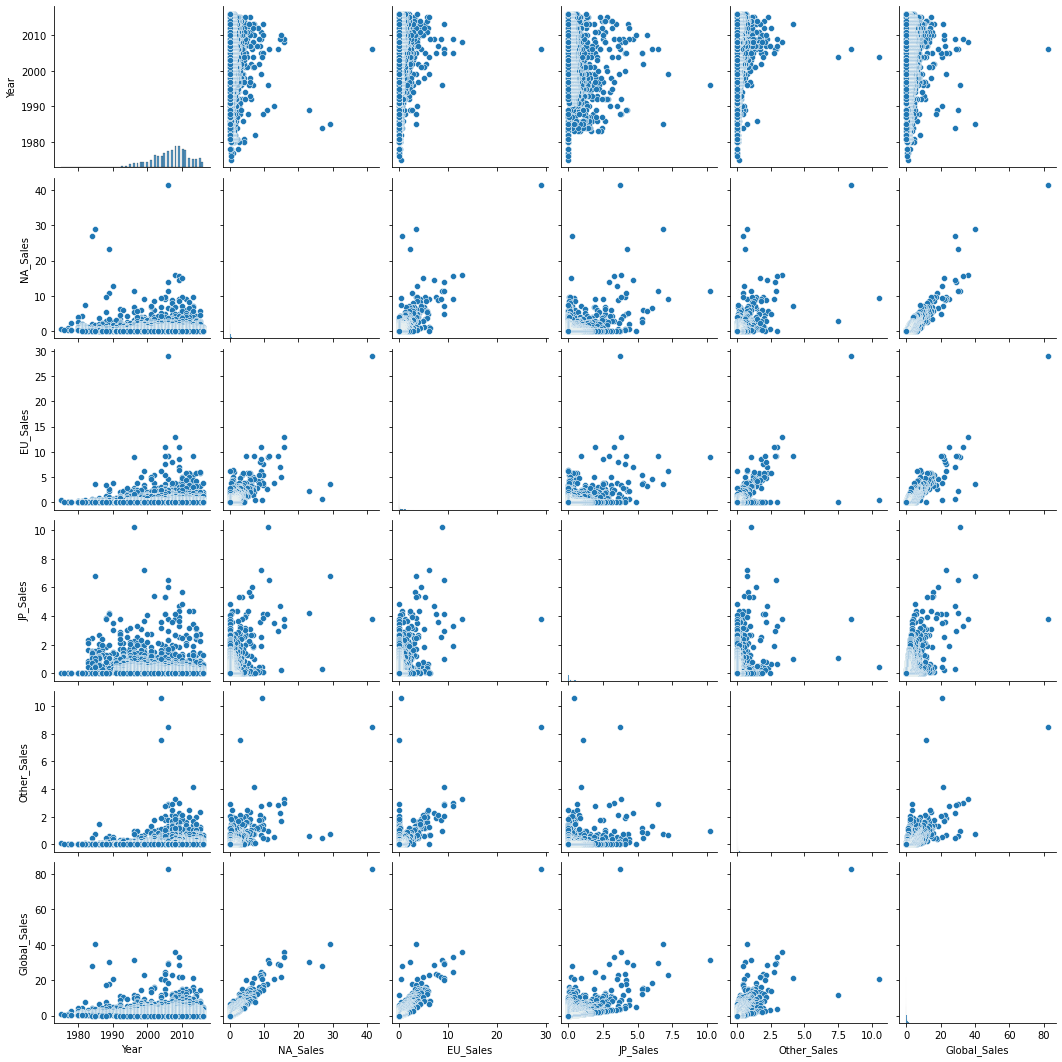

In [25]:
sns.pairplot(final[["Year","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]])

**The tables below show that how Nintendo has been dominant in the video game market. We can also observe that North America is the biggest video game market as well.**

In [26]:
final.sort_values(by="NA_Sales", ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


In [27]:
final.sort_values(by="Global_Sales", ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [28]:
final.sort_values(by = "JP_Sales", ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
41,42,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


In [29]:
final.sort_values(by = "EU_Sales", ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [30]:
final.sort_values(by = "Other_Sales", ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
348,349,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


In [31]:
final.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [32]:
final.sort_values(by = "Year", ascending = True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2173,2175,Wheel of Fortune,PS2,1975,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
5798,5800,Slot Machine,2600,1976,Action,Atari,0.29,0.02,0.00,0.00,0.31
4232,4234,Circus Atari,2600,1977,Action,Atari,0.43,0.03,0.00,0.00,0.46
2113,2115,Air-Sea Battle,2600,1977,Shooter,Atari,0.91,0.06,0.00,0.01,0.98
5061,5063,Hangman,2600,1978,Puzzle,Atari,0.35,0.02,0.00,0.00,0.38
...,...,...,...,...,...,...,...,...,...,...,...
10591,10593,Total War: WARHAMMER,PC,2016,Strategy,Sega,0.00,0.10,0.00,0.01,0.10
12631,12633,Super Robot Wars OG: The Moon Dwellers,PS3,2016,Misc,Namco Bandai Games,0.00,0.00,0.06,0.00,0.06
1189,1191,Dark Souls III,PS4,2016,Role-Playing,Namco Bandai Games,0.58,0.44,0.33,0.21,1.56
15801,15804,XCOM 2,XOne,2016,Strategy,Take-Two Interactive,0.01,0.01,0.00,0.00,0.02


In [33]:
sort = final.sort_values(by = "Genre", ascending = True)

genre_count = []

for index, year in enumerate(sort["Year"]):
    subset = sort.iloc[:index + 1]
    count = len(subset[subset["Year"] == year])
    genre_count.append(count)


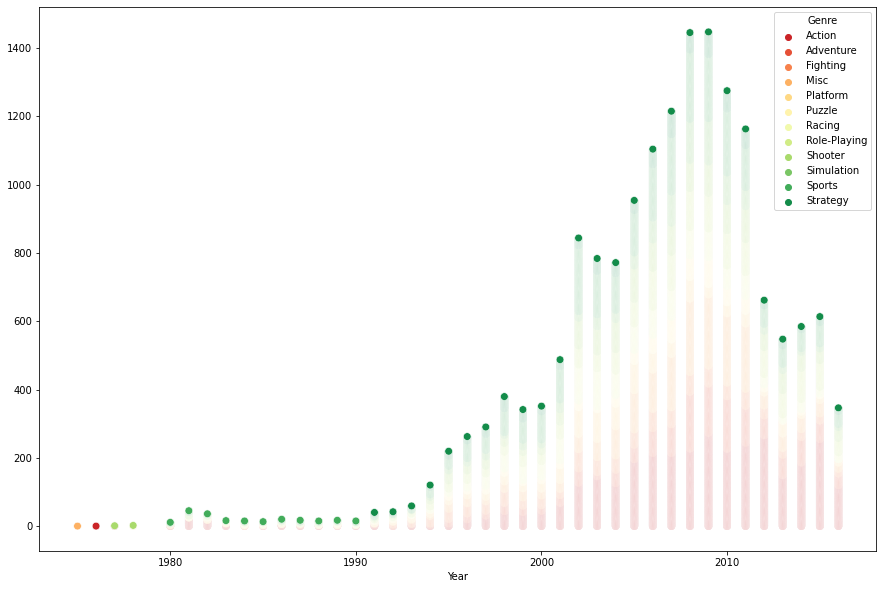

In [34]:
plt.figure(figsize = (15, 10))
a = sns.scatterplot(x= sort["Year"], y =  genre_count, hue = sort["Genre"], s = 60, palette = "RdYlGn")
plt.show()

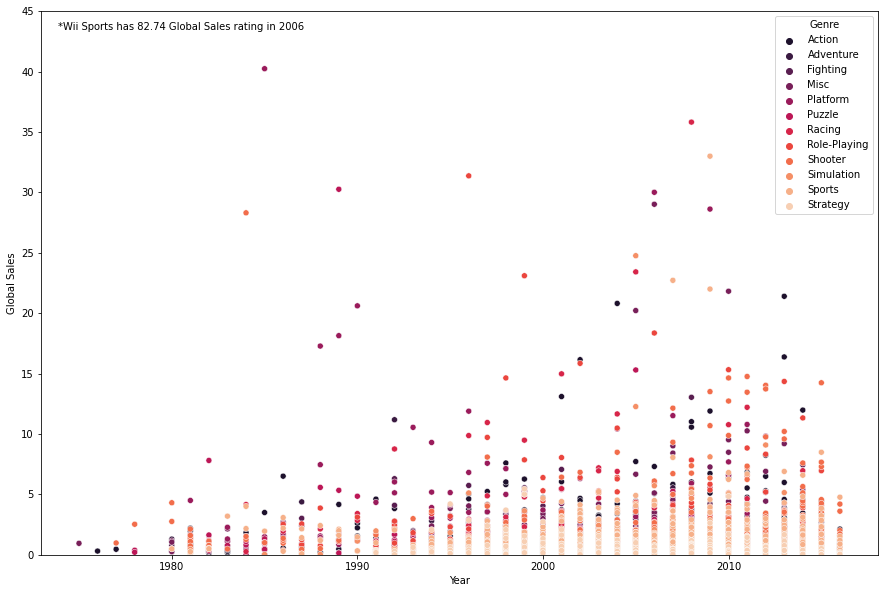

In [35]:
# sort = sort.sort_values(by = "Global_Sales", ascending = True)
plt.figure(figsize = (15, 10))
plt.ylim([0, 45])
ax = sns.scatterplot(data = sort, x = "Year", y = "Global_Sales", hue = "Genre", palette = "rocket")
plt.ylabel("Global Sales")
plt.xlabel("Year")
ax.text(0.02, 0.98, "*Wii Sports has 82.74 Global Sales rating in 2006", ha = "left", va = "top", transform = ax.transAxes)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


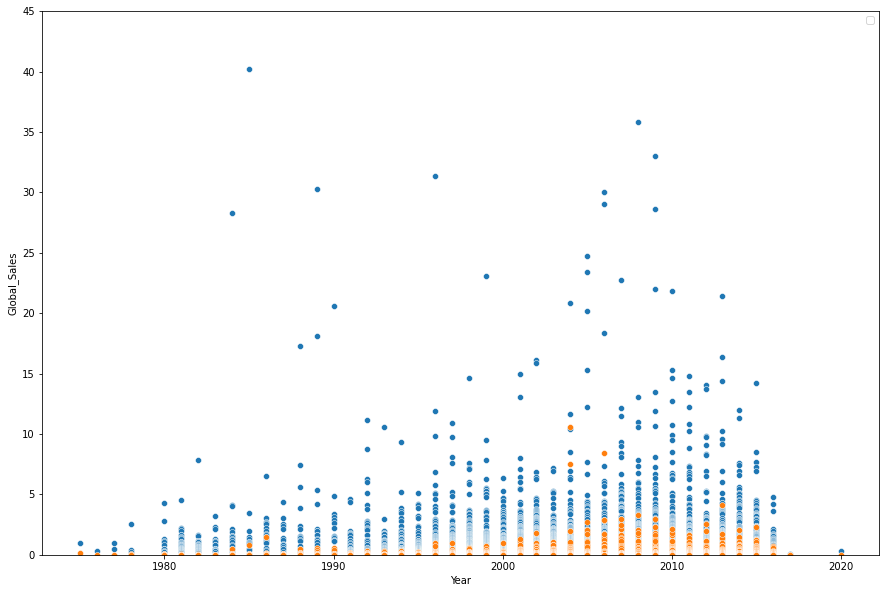

In [209]:
# plt.figure(figsize = (15, 10))
# plt.ylim([0, 45])
# sns.scatterplot(data = final, x = "Year", y = "Global_Sales")
# sns.scatterplot(data = final, x = "Year", y = "Other_Sales")

In [36]:
final.groupby("Publisher")["Rank"].nunique().sort_values(ascending = False).reset_index(name = "Count")

,Publisher,Count
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
...,...,...
573,Playmates,1
574,Playmore,1
575,Plenty,1
576,Pony Canyon,1


In [40]:
final.groupby("Platform")["Rank"].nunique().sort_values(ascending = False).reset_index(name = "Count")

,Platform,Count
0,DS,2163
1,PS2,2161
2,PS3,1329
3,Wii,1325
4,X360,1265
5,PSP,1213
6,PS,1196
7,PC,960
8,XB,824
9,GBA,822


In [41]:
final.loc[final["Platform"] == "DS", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "Wii", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "GBA", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "GB", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "GC", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "3DS", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "N64", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "NES", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "SNES", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "WiiU", "Publisher 1.0"] = "Nintendo"
final.loc[final["Platform"] == "SCD", "Publisher 1.0"] = "Nintendo"

final.loc[final["Platform"] == "PS2", "Publisher 1.0"] = "Sony"
final.loc[final["Platform"] == "PS3", "Publisher 1.0"] = "Sony"
final.loc[final["Platform"] == "PS4", "Publisher 1.0"] = "Sony"
final.loc[final["Platform"] == "PSP", "Publisher 1.0"] = "Sony"
final.loc[final["Platform"] == "PS", "Publisher 1.0"] = "Sony"
final.loc[final["Platform"] == "PSV", "Publisher 1.0"] = "Sony"

final.loc[final["Platform"] == "X360", "Publisher 1.0"] = "Microsoft"
final.loc[final["Platform"] == "XB", "Publisher 1.0"] = "Microsoft"
final.loc[final["Platform"] == "XOne", "Publisher 1.0"] = "Microsoft"

final.loc[final["Platform"] == "SAT", "Publisher 1.0"] = "Other"
final.loc[final["Platform"] == "DC", "Publisher 1.0"] = "Other"
final.loc[final["Platform"] == "GEN", "Publisher 1.0"] = "Other"
final.loc[final["Platform"] == "NG", "Publisher 1.0"] = "Other"
final.loc[final["Platform"] == "WS", "Publisher 1.0"] = "Other"
final.loc[final["Platform"] == "3DO", "Publisher 1.0"] = "Other"
final.loc[final["Platform"] == "TG16", "Publisher 1.0"] = "Other"
final.loc[final["Platform"] == "PCFX", "Publisher 1.0"] = "Other"
final.loc[final["Platform"] == "GG", "Publisher 1.0"] = "Other"

final.loc[final["Platform"] == "2600", "Publisher 1.0"] = "Atari"
final.loc[final["Platform"] == "PC", "Publisher 1.0"] = "PC"

In [42]:
company = final.groupby("Publisher 1.0")["Rank"].nunique().sort_values(ascending = False).reset_index(name = "Count")
# company = company.set_index("Publisher 1.0")
# company["pct"] = round(company.div(company.sum(axis = 0), axis = 1) * 100, 2)
company

,Publisher 1.0,Count
0,Sony,6648
1,Nintendo,6278
2,Microsoft,2302
3,PC,960
4,Other,277
5,Atari,133


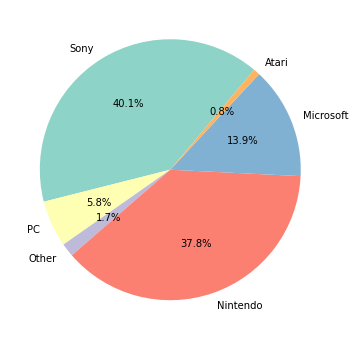

In [43]:
company = company.sort_values(by = "Publisher 1.0", ascending = False)

fig, ax = plt.subplots(figsize = (6, 6))
colors = sns.color_palette("Set3", 10)
ax.pie(company["Count"], labels = company["Publisher 1.0"], colors = colors, autopct = '%1.1f%%', 
       shadow = False, startangle = 50)
plt.show()


# cmap = plt.get_cmap('Spectral')
# colors = [cmap(i) for i in np.linspace(0, 1, 6)]

# def func(pct, allvals):
#     absolute = int(np.round(pct/100.*np.sum(allvals)))
#     return "{:.1f}%\n({:d} g)".format(pct, absolute)

# fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(aspect = "equal"))
# wedges, texts = ax.pie(company["Count"], wedgeprops = dict(width = 1), startangle = 50, colors = colors)

# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(arrowprops=dict(arrowstyle="-"),
#           bbox=bbox_props, zorder=0, va="center")

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = "angle,angleA=0,angleB={}".format(ang)
#     kw["arrowprops"].update({"connectionstyle": connectionstyle})
#     ax.annotate(company.iloc[i]["Publisher 1.0"], xy=(x, y), xytext=(1.15*np.sign(x), 1.15*y),
#                 horizontalalignment=horizontalalignment, **kw)

# plt.show()